In [ ]:
# Question 2 script

In [1]:
# Import Pandas and Numpy Library
import pandas as pd
import numpy as np

In [2]:
# Read in Montana csv files
Montana = pd.read_csv('MT-clean.csv')

/Users/emechebe/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Montana.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,lon,ethnicity,city,out_of_state,vehicle_year,vehicle_make,vehicle_model,vehicle_style,search_reason,stop_outcome_raw
0,MT-2009-00001,MT,2009-01-01,02:10,CASCADE,Cascade County,30013.0,US 89 N MM10 (SB),NaN,F,...,-111.802932,N,NaN,False,1994,FORD,EXPLORER,SPORT UTILITY,NaN,"TRAFFIC CITATION,WARNING"
1,MT-2009-00002,MT,2009-01-02,11:34,MISSOULA,Missoula County,30063.0,HWY 93 SO AND ANNS LANE S/B,NaN,M,...,-114.081142,N,NaN,False,1996,GMC,TK,TRUCK,NaN,"INFFRACTION ARREST,WARNING"
2,MT-2009-00003,MT,2009-01-03,11:36,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 77 N/B,NaN,M,...,-114.073505,N,NaN,False,1999,GMC,YUKON,SPORT UTILITY,NaN,INFFRACTION ARREST
3,MT-2009-00004,MT,2009-01-04,10:33,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 81 S/B,NaN,F,...,-114.079027,NaN,NaN,False,2002,HOND,CR-V,SPORT UTILITY,NaN,INFFRACTION ARREST
4,MT-2009-00005,MT,2009-01-04,10:46,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 81 N/B,NaN,M,...,-114.079150,NaN,NaN,False,1992,TOYT,TERCEL,SEDAN,NaN,INFFRACTION ARREST


In [4]:
# Number of stops
Total_Stops=Montana.shape[0]

In [5]:
Total_Stops

825118

In [6]:
# Number of male stops
Male_Stops=Montana[Montana.driver_gender == 'M'].shape[0]

In [7]:
Male_Stops

556934

In [8]:
# What proportion of traffic stops in Montana involved male drivers?
Male_Stops/float(Total_Stops)

0.6749749732765495

In [9]:
# How many more times likely are you to be arrested in Montana during a 
# traffic stop if you have out of state plates?
# I cast the question as:
# Probability of arrest given out of state plates / Probability of arrest given in state policies

In [10]:
# Calculate the Probability of arrest given out of state plates
def get_OutOfSate_Prob():
    # Get the number of out of state stops
    Total_Out_of_State_Stops=Montana[Montana.out_of_state == True].shape[0]
    
    # Save the out of state data in new dataframe
    OutState=Montana[Montana.out_of_state == True]
    # Remove nulls in the stop_outcome column
    OutState_NotNull=OutState[OutState.stop_outcome_raw.notnull()]
    # Get all the data that resulted in arrest
    OutState_Arrest=OutState_NotNull[OutState_NotNull.stop_outcome_raw.str.contains('ARREST')]
    # Get the number of out of state arrests
    Out_of_State_Arrests=OutState_Arrest.shape[0]
    Probability = Out_of_State_Arrests/float(Total_Out_of_State_Stops)
    return Probability
    

In [11]:
Out_of_State_Prob=get_OutOfSate_Prob()
Out_of_State_Prob

0.02390481288149243

In [12]:
# Calculate the Probability of arrest given in state plates
def get_InState_Prob():
    # Get the number of out of state stops
    Total_In_State_Stops=Montana[Montana.out_of_state == False].shape[0]
    
    # Save the out of state data in new dataframe
    InState=Montana[Montana.out_of_state == False]
    # Remove nulls in the stop_outcome column
    InState_NotNull=InState[InState.stop_outcome_raw.notnull()]
    # Get all the data that resulted in arrest
    InState_Arrest=InState_NotNull[InState_NotNull.stop_outcome_raw.str.contains('ARREST')]
    # Get the number of out of state arrests
    In_State_Arrests=InState_Arrest.shape[0]
    Probability = In_State_Arrests/float(Total_In_State_Stops)
    return Probability

In [13]:
In_State_Prob=get_InState_Prob()
In_State_Prob

0.01976399936443907

In [14]:
# How many times more likely are you to be arrested in Montana if you are out of state?
Out_of_State_Prob/float(In_State_Prob)

1.2095129351452942

In [15]:
# Perform a (χ2) test to determine whether the proportions of arrests in these two populations are equal. 
# What is the value of the test statistic?
# For this analysis, I set up my null and alternative hypothesis

# Null hypothesis : Proportion of out of state arrests is same as proportion of in state arrests
# Alternative hypothesis : Proportion of out of state arrests is NOT same as proportion of in state arrests
# I set a 2 by 2 contingency table where the 2 columns are Arrests and No Arrests and the 2 rows
# are Out_State and In_State

![title](Contigency_Table.png)

In [16]:
# So fill in the cells. 
# Total out of state stops = ?
# Out of state stops that resulted in arrests = ?
# Out of state stops that did not result in arrests = ?

# Total IN state stops = ?
# In state stops that resulted in arrests = ?
# In state stops that did not result in arrests = ?

In [17]:
def OutofStateNumbers ():
    # Get the number of out of state stops
    Total_Out_of_State_Stops=Montana[Montana.out_of_state == True].shape[0]
    
    # Save the out of state data in new dataframe
    OutState=Montana[Montana.out_of_state == True]
    # Remove nulls in the stop_outcome column
    OutState_NotNull=OutState[OutState.stop_outcome_raw.notnull()]
    # Get all the data that resulted in arrest
    OutState_Arrest=OutState_NotNull[OutState_NotNull.stop_outcome_raw.str.contains('ARREST')]
    # Get the number of out of state arrests
    Out_of_State_Arrests=OutState_Arrest.shape[0]
    return Total_Out_of_State_Stops, Out_of_State_Arrests

In [18]:
Total_Out_of_State_Stops, Out_of_State_Arrests=OutofStateNumbers ()

In [19]:
# Get the out of state that did not result in arrests
Out_of_State_NoArrests = Total_Out_of_State_Stops - Out_of_State_Arrests

In [20]:
def InStateNumbers ():
    # Get the number of out of state stops
    Total_In_State_Stops=Montana[Montana.out_of_state == False].shape[0]
    
    # Save the out of state data in new dataframe
    InState=Montana[Montana.out_of_state == False]
    # Remove nulls in the stop_outcome column
    InState_NotNull=InState[InState.stop_outcome_raw.notnull()]
    # Get all the data that resulted in arrest
    InState_Arrest=InState_NotNull[InState_NotNull.stop_outcome_raw.str.contains('ARREST')]
    # Get the number of out of state arrests
    In_State_Arrests=InState_Arrest.shape[0]
    return Total_In_State_Stops, In_State_Arrests

In [21]:
Total_In_State_Stops, In_State_Arrests=InStateNumbers()

In [22]:
# Get the In state that did not result in arrests
In_State_NoArrests = Total_In_State_Stops - In_State_Arrests

In [23]:
TotalNumberOfArrests = Out_of_State_Arrests + In_State_Arrests
TotalNumberOfArrests

17058

In [24]:
TotalNumberOfNoArrests = Out_of_State_NoArrests + In_State_NoArrests
TotalNumberOfNoArrests

803361

![title](Contigency_Table1.png)

In [25]:
# These are all observed values. Calculate the expected values
# Cell 1 = (203641 * 17058)/820419 = 4234
# Cell 2 = (203641 * 803361)/820419 = 199406
# Cell 3 = (616778 * 17058)/820419 = 12823
# Cell 4 = (616778 * 803361)/820419 = 603954

![title](Contigency_Table2.png)

In [26]:
# Now calculate the Chi square T test statistic
# [(4868 - 4234)^^2/4234] + [(198773 - 199406)^^2/199406] + [(12190 - 12823)^^2/12823] + [(604588 - 603954)^^2/603954]
# Chi square t test statistic  equals 128


# Used R to determine the p value of the chisquare test statistic and the degree of freedom is number of classes - 1(2- 1 = 1)
## > pchisq(128,1,lower.tail = F)
## [1] 1.12243e-29

In [27]:
# What proportion of traffic stops in Montana resulted in speeding violations? 
# In other words, find the number of violations that include "Speeding" in the violation description 
# and divide that number by the total number of stops (or rows in the Montana dataset).

#Montana.head()
# Remove nulls in the violation column. Nulls does not allow for indexing
Montana_NotNull=Montana[Montana.violation.notnull()]
# Get all the data in Montana whose outcome ended in a speeding ticket
Montana_speeding=Montana_NotNull[Montana_NotNull.violation.str.contains('Speeding')].shape[0]
Montana_speeding
# Total number of stops in Montana
Total_stops = Montana.shape[0]

# Proportion of traffic stops that resulted in speeding violations? 
Montana_speeding/float(Total_stops) * 100

65.80998111785223

In [28]:
# 65 percent of all Montana stops ended was about speeding violations

In [28]:
# How much more likely does a traffic stop in Montana result in a DUI than a traffic stop in Vermont? 
# To compute the proportion of traffic stops that result in a DUI, 
# divide the number of stops with "DUI" in the violation description by the total number of stops.

In [29]:
# Probability that a traffic stop in Montana results in a DUI?
# Number of Montana stops resulting in a DUI
Montana_DUI=Montana_NotNull[Montana_NotNull.violation.str.contains('DUI')].shape[0]
# Montana_DUI
# Total Number of Montana Stops
Montana_Total_stops = Montana.shape[0]

# Probability of traffic stop resulting in DUI in Montana
Montana_DUI/float(Montana_Total_stops) * 100

1.0803303285105887

In [30]:
# Read in Vermont data
Vermont = pd.read_csv('VT-clean.csv')

/Users/emechebe/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
# Probability that a traffic stop in Vermont results in a DUI?
# Remove nulls in the violation column. Nulls does not allow for indexing
Vermont_NotNull=Vermont[Vermont.violation.notnull()]
# Number of Vermont stops resulting in a DUI
Vermont_DUI=Vermont_NotNull[Vermont_NotNull.violation.str.contains('DUI')].shape[0]
# Total Number of Vermont Stops
Vermont_Total_stops = Vermont.shape[0]

# Probability of traffic stop resulting in DUI in Vermont
Vermont_DUI/float(Vermont_Total_stops) * 100

0.26439804437227526

In [32]:
1.08/float(0.2)

5.4

In [34]:
# A traffic stop in Montana is ~5x likelier to result in a DUI than a traffic stop in Vermont

In [35]:
# What is the extrapolated, average manufacture year of vehicles involved in traffic stops in Montana in 2020? 
# To answer this question, calculate the average vehicle manufacture year for each year's traffic stops. 
# Extrapolate using a linear regression.

In [33]:
# Remove the Nulls in the stop_date column
Montana_NotNull=Montana[Montana.stop_date.notnull()]
# Remove the Nulls in the vehicle_year column
Montana_NotNull_vehicle_null=Montana_NotNull[Montana_NotNull.vehicle_year.notnull()]
# Convert the vehicle_year values into numeric data type
Montana_NotNull_vehicle_null.vehicle_year=pd.to_numeric(Montana_NotNull_vehicle_null.vehicle_year, errors='coerce')
# Create a new column in the dataset that is in the datetime format
Montana_NotNull_vehicle_null['DateFormat'] =  pd.to_datetime(Montana_NotNull_vehicle_null['stop_date'], format='%Y-%m-%d')
# Create a new column that contains just the year 
Montana_NotNull_vehicle_null['stop_year'] = Montana_NotNull_vehicle_null.DateFormat.dt.year
# Filter the vehicle_year to remove all NAN values
filtered_data = Montana_NotNull_vehicle_null[~Montana_NotNull_vehicle_null['vehicle_year'].isnull()]
# Group by the stop_year column and calculate the mean of the vehicle_year for each year
Avg_Vehicle_Year=filtered_data.groupby('stop_year').agg({'vehicle_year':np.average})

/Users/emechebe/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/emechebe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/emechebe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [34]:
Avg_Vehicle_Year

,vehicle_year
stop_year,
2009,2000.980215
2010,2001.521377
2011,2002.280938
2012,2003.362207
2013,2003.905175
2014,2004.482506
2015,2005.295767
2016,2005.872128


In [35]:
Avg_Vehicle_Year['stop_year'] = Avg_Vehicle_Year.index

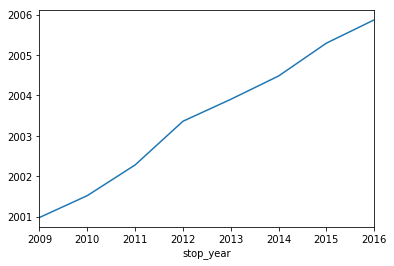

In [36]:
%matplotlib inline 
Avg_Vehicle_Year.vehicle_year.plot()

In [37]:
X_matrix = Avg_Vehicle_Year.stop_year.values.reshape(-1,1)

In [38]:
X_matrix

array([[2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016]])

In [39]:
y_matrix = Avg_Vehicle_Year.vehicle_year.values

In [40]:
y_matrix

array([2000.98021484, 2001.52137704, 2002.28093777, 2003.36220682,
       2003.9051753 , 2004.4825065 , 2005.29576691, 2005.87212849])

In [41]:
from sklearn import linear_model

In [42]:
lm = linear_model.LinearRegression()
model = lm.fit(X_matrix,y_matrix)

In [43]:
predictions = lm.predict(2020)

In [44]:
predictions 

array([2008.84316596])

In [45]:
lm.score(X_matrix,y_matrix)

0.9943630751989371

In [46]:
(X_matrix,y_matrix)

(array([[2009],
        [2010],
        [2011],
        [2012],
        [2013],
        [2014],
        [2015],
        [2016]]),
 array([2000.98021484, 2001.52137704, 2002.28093777, 2003.36220682,
        2003.9051753 , 2004.4825065 , 2005.29576691, 2005.87212849]))

In [47]:
import statsmodels.formula.api as smf

In [48]:
lm1 = smf.ols(formula='vehicle_year ~ stop_year', data=Avg_Vehicle_Year).fit()

In [49]:
# print the coefficients
lm1.params

Intercept    559.661028
stop_year      0.717417
dtype: float64

In [50]:
lm1.pvalues

Intercept    1.522647e-05
stop_year    5.609148e-08
dtype: float64

In [51]:
# Combining both the Vermont and Montana datasets, 
# find the hours when the most and least number of traffic stops occurred?
Combined_data = pd.concat([Montana, Vermont])
Combined_data.head()

,city,contraband_found,county_fips,county_name,driver_age,driver_age_raw,driver_gender,driver_race,driver_race_raw,ethnicity,...,stop_date,stop_outcome,stop_outcome_raw,stop_time,vehicle_make,vehicle_model,vehicle_style,vehicle_year,violation,violation_raw
0,NaN,False,30013.0,Cascade County,16.0,16.0,F,White,White,N,...,2009-01-01,Citation,"TRAFFIC CITATION,WARNING",02:10,FORD,EXPLORER,SPORT UTILITY,1994,"Other,Paperwork,Safe movement","240 - INSURANCE,150 - HIT AND RUN,245 - OTHER ..."
1,NaN,False,30063.0,Missoula County,19.0,19.0,M,White,White,N,...,2009-01-02,Arrest,"INFFRACTION ARREST,WARNING",11:34,GMC,TK,TRUCK,1996,"Other (non-mapped),Seat belt","EXPIRED TAG ( 4 MONTHS OR LESS ),SEATBELT ( DR..."
2,NaN,False,30063.0,Missoula County,17.0,17.0,M,White,White,N,...,2009-01-03,Arrest,INFFRACTION ARREST,11:36,GMC,YUKON,SPORT UTILITY,1999,Speeding,SPEED
3,NaN,False,30063.0,Missoula County,17.0,17.0,F,NaN,NaN,NaN,...,2009-01-04,Arrest,INFFRACTION ARREST,10:33,HOND,CR-V,SPORT UTILITY,2002,Speeding,SPEED
4,NaN,False,30063.0,Missoula County,31.0,31.0,M,NaN,NaN,NaN,...,2009-01-04,Arrest,INFFRACTION ARREST,10:46,TOYT,TERCEL,SEDAN,1992,"Seat belt,Speeding","SPEED,SEATBELT ( DRIVER )"


In [52]:
Combined_data.shape

(1108403, 34)

In [53]:
Combined_data.stop_time.head()

0    02:10
1    11:34
2    11:36
3    10:33
4    10:46
Name: stop_time, dtype: object

In [54]:
# Create a new column in the dataset that is in the datetime format
Combined_data['TimeFormat'] =  pd.to_datetime(Combined_data.stop_time)

In [55]:
Combined_data.TimeFormat.head()

0   2018-04-30 02:10:00
1   2018-04-30 11:34:00
2   2018-04-30 11:36:00
3   2018-04-30 10:33:00
4   2018-04-30 10:46:00
Name: TimeFormat, dtype: datetime64[ns]

In [56]:
# Now replace the TimeFormat column with just the hour
Combined_data['TimeFormat'] = Combined_data.TimeFormat.dt.hour

In [57]:
Combined_data.TimeFormat.head()

0     2.0
1    11.0
2    11.0
3    10.0
4    10.0
Name: TimeFormat, dtype: float64

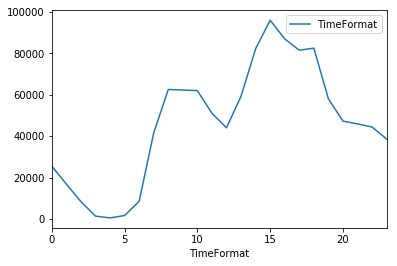

In [58]:
# Now group by Timeformat and return a sum of each grouping. Here we plot the result
Combined_data.groupby('TimeFormat').agg({'TimeFormat':len}).plot()

In [59]:
# Hour of the most arrest?
Result_of_group_by=Combined_data.groupby('TimeFormat').agg({'TimeFormat':len})

In [60]:
Result_of_group_by.head()

,TimeFormat
TimeFormat,
0.0,25490.0
1.0,16856.0
2.0,8399.0
3.0,1425.0
4.0,547.0


In [61]:
Peak_Crime = Result_of_group_by.max()[0]

In [62]:
Peak_Crime 

95891.0

In [63]:
# Hour in which this peak crime time fell in
Result_of_group_by[Result_of_group_by.TimeFormat==Peak_Crime].index.item()

15.0

In [64]:
# Hour of lowest crime rate
# Hour of the least arrest?
Low_Crime = Result_of_group_by.min()[0]
# Hour in which this low crime time fell in
Result_of_group_by[Result_of_group_by.TimeFormat==Low_Crime].index.item()


4.0

In [65]:
# What is the difference in the total number of stops that occurred in these two hours?
Peak_Crime - Low_Crime

95344.0